In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# manually add a2e-mmc repos to PYTHONPATH if needed
import os, sys
module_path = os.path.join(os.environ['HOME'],'a2e-mmc')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from mmctools.plotting import plot_profile
import assessment.studies.budget_components_coupling.helpers as helper

In [5]:
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16

# SWIFT budget components coupling study: Plot microscale comparison
written by [Eliot Quon](mailto:eliot.quon@nrel.gov)

Assess development of turbulent ABL based on `run.tency.w0_L0`

In [6]:
plotstart = pd.to_datetime('2013-11-08 12:00')
plotend = pd.to_datetime('2013-11-08 15:00')

Main directories on Eagle

In [7]:
datadir = '/projects/mmc/dallaert/budget_component_coupling/'
referencedir = '/projects/mmc/dallaert/referenceData/'

Name of SOWFA simulation folder

In [8]:
prefix = 'run.tency.'
# simulation_data = {
#     'L3_T0':    os.path.join(datadir,prefix+'w0_L0'),
#     'L3_T60':   os.path.join(datadir,prefix+'w60_L0'),
#     'L3_T120':  os.path.join(datadir,prefix+'w120_L0'),
#     'L3_T180':  os.path.join(datadir,prefix+'w180_L0'),
#     'L9_T0':    os.path.join(datadir,prefix+'w0_L6000'),
#     'L9_T60':   os.path.join(datadir,prefix+'w60_L6000'),
#     'L9_T120':  os.path.join(datadir,prefix+'w120_L6000'),
#     'L9_T180':  os.path.join(datadir,prefix+'w180_L6000'),
#     'L27_T0':   os.path.join(datadir,prefix+'w0_L24000'),
#     'L27_T60':  os.path.join(datadir,prefix+'w60_L24000'),
#     'L27_T120': os.path.join(datadir,prefix+'w120_L24000'),
#     'L27_T180': os.path.join(datadir,prefix+'w180_L24000'),
# }
simpath = os.path.join(datadir,prefix+'w0_L0')  # L3_T0

Output folder to store figures

In [9]:
figuredir = 'Figures'

if not os.path.isdir(figuredir):
    os.makedirs(figuredir)

## 1. Load microscale data

In [10]:
%%time
fpath = os.path.join(simpath,'postProcessing/planarAverages')
df = helper.reader_planar_average(fpath)

# Resample data to 10-min averages
df_10min = df.unstack().resample('10min').mean().stack()
# Calculate some quantities of interest
helper.calc_QOIs(df_10min)
# Store result in dictionary
pavg = df_10min

# CPU times: user 35.7 s, sys: 3.94 s, total: 39.6 s
# Wall time: 40.8 s

Simulation (re)start times: [43200.0, 72000.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
CPU times: user 36.5 s, sys: 16.5 s, total: 53 s
Wall time: 54 s


## 2. Plot results

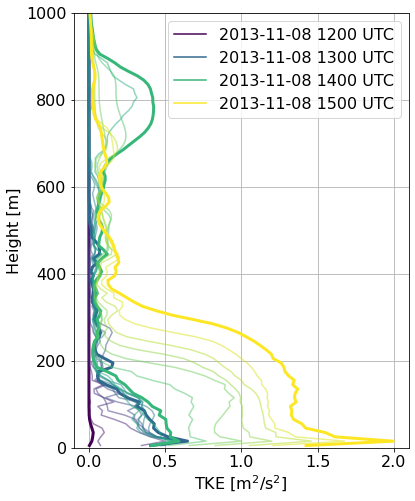

In [11]:
fig,ax = plt.subplots(figsize=(6,8))
plot_profile(pavg,fields=['TKE'],
             timerange=(plotstart,plotend),
             heightlimits=(0,1000),
             alpha=0.5,
             fig=fig,ax=ax)
handles,labels = ax.get_legend_handles_labels()
for line in handles[::6]:
    line.set_alpha(1)
ax.legend(handles[::6],labels[::6],
          loc='upper right', fontsize=16)
for line in handles[::6]:
    line.set_linewidth(3)
    
figname = 'TKE_profile_history_{:s}-{:s}Z'.format(
        plotstart.strftime('%H'),
        plotend.strftime('%H'))
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')